In [396]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import HTML
import io
import base64
import xgboost
from sklearn.model_selection import GridSearchCV
from scipy.stats import boxcox ,boxcox_normplot

In [397]:
df_train = pd.read_csv('C:/Users/odize/Documents/HousePrice_Kaggle/train.csv')
df_test = pd.read_csv('C:/Users/odize/Documents/HousePrice_Kaggle/test.csv')

In [398]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [399]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

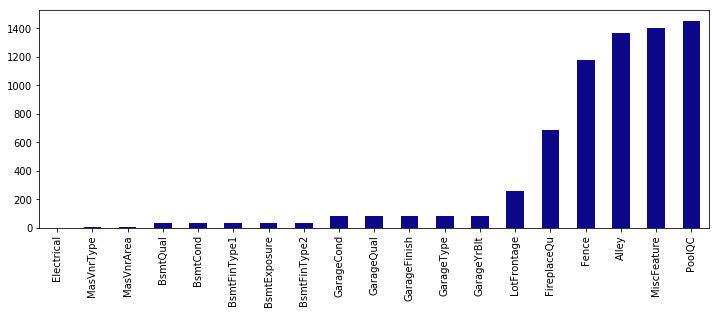

In [400]:
null_values = df_train.isnull().sum()
null_values = null_values[null_values > 0]
null_values.sort_values(inplace=True)
null_values.plot(kind='bar', colormap='plasma', figsize=(12,4))

In [401]:
df_train.drop(columns=['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageYrBlt',
                      'GarageType', 'GarageFinish'], inplace=True);

In [402]:
df_train = df_train.replace({"MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun", 7 : "Jul"
                                         , 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"},
                             "MSSubClass" : {20 : "class20", 30 : "class30", 40 : "class40", 45 : "class45", 50 : "class50", 
                                             60 : "class60", 70 : "class70", 75 : "class75", 80 : "class80", 85 : "class85", 
                                             90 : "class90", 120 : "class120", 150 : None, 160 : "class160", 
                                             180 : "class180", 190 : "class190"},})

In [403]:
#Later, it turns out that the variables do not match their levels in the test set
df_train.drop(columns=['MSZoning', 'KitchenQual', 'Exterior1st', 'Exterior2nd'], inplace=True)
df_test.drop(columns=['MSZoning', 'KitchenQual', 'Exterior1st', 'Exterior2nd'], inplace=True)
df_train = df_train[df_train['HouseStyle']!='2.5Fin']

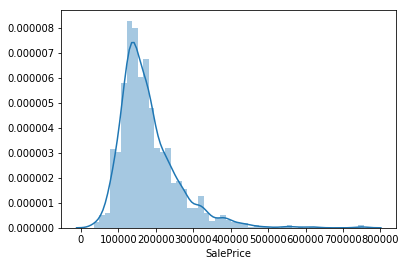

In [404]:
sns.distplot(df_train.SalePrice)


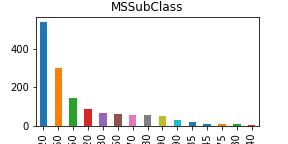
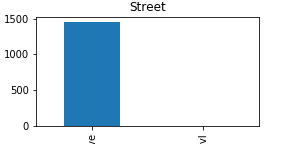
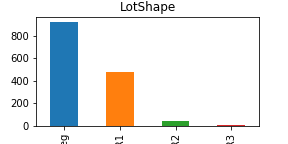
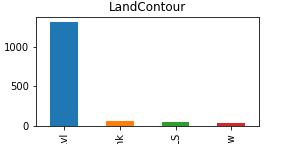
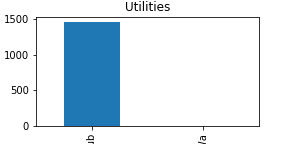
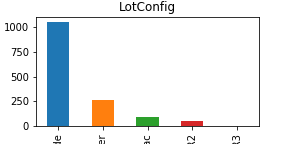
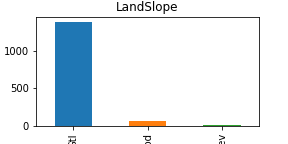
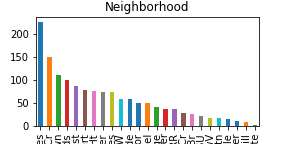
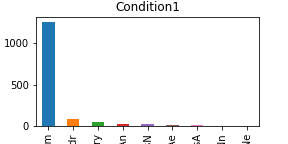
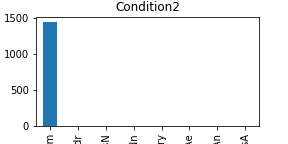
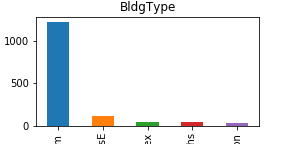
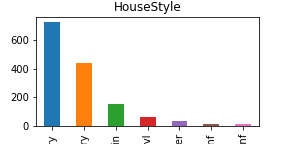
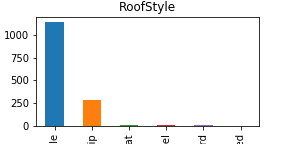
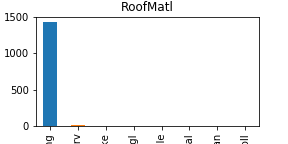
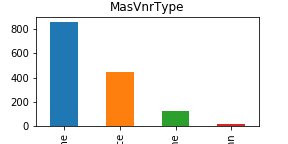
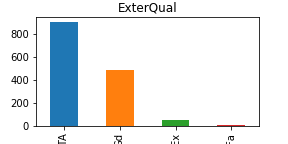
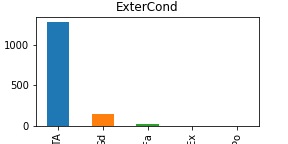
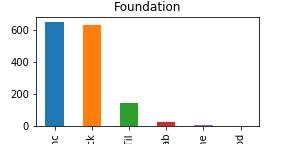
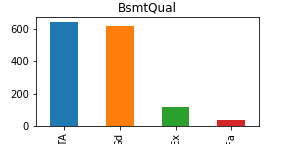
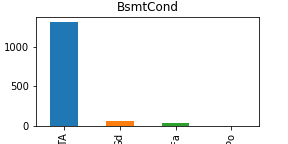
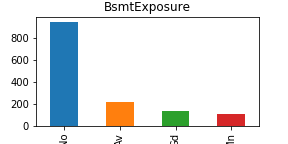
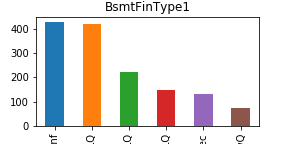
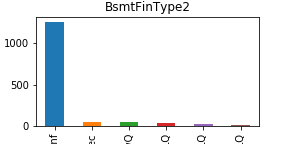
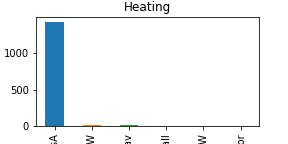
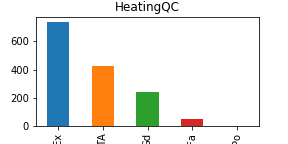
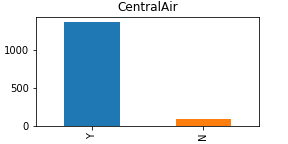
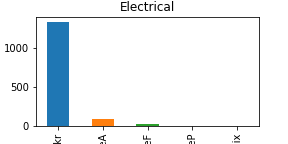
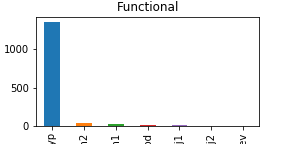
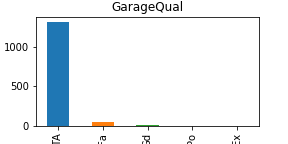
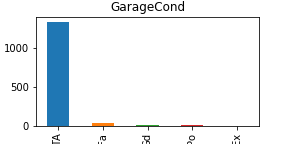
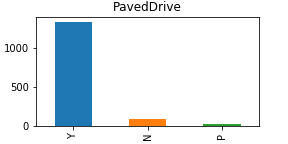
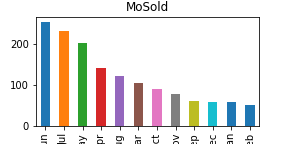
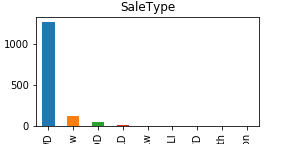
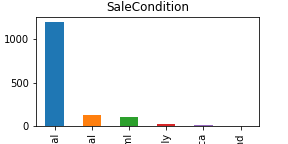

In [405]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
import io
import base64


class FlowLayout(object):
    ''' A class / object to display plots in a horizontal / flow layout below a cell '''
    def __init__(self):
        # string buffer for the HTML: initially some CSS; images to be appended
        self.sHtml =  """
        <style>
        .floating-box {
        display: inline-block;
        margin: 10px;
        border: 3px solid #888888;  
        }
        </style>
        """

    def add_plot(self, oAxes):
        ''' Saves a PNG representation of a Matplotlib Axes object '''
        Bio=io.BytesIO() # bytes buffer for the plot
        fig = oAxes.get_figure()
        fig.canvas.print_png(Bio) # make a png of the plot in the buffer

        # encode the bytes as string using base 64 
        sB64Img = base64.b64encode(Bio.getvalue()).decode()
        self.sHtml+= (
            '<div class="floating-box">'+ 
            '<img src="data:image/png;base64,{}\n">'.format(sB64Img)+
            '</div>')

    def PassHtmlToCell(self):
        ''' Final step - display the accumulated HTML '''
        display(HTML(self.sHtml))


oPlot = FlowLayout() 


nominal_columns = df_train.select_dtypes(include=['object'])

var_dist = None
for column in nominal_columns:
    var_dist = nominal_columns[column].value_counts()
    plot = var_dist.plot(kind='bar', title=column, figsize=(4, 2))
    oPlot.add_plot(plot) 
    plt.close() 


oPlot.PassHtmlToCell()

In [406]:
df_train.drop(columns=['Street', 'Utilities', 'LandContour', 'Condition2', 'RoofStyle', 'RoofMatl','BsmtFinType2', 'Heating', 
                       'Functional', 'GarageQual', 'Electrical', 'SaleType', 'GarageCond', 'BsmtFinSF2'],
              inplace=True);

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000001CC138BE198>>
Traceback (most recent call last):
  File "C:\Users\odize\Anaconda3\lib\site-packages\xgboost\core.py", line 368, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


In [407]:
local_var = None
for column in df_train:
    local_var = df_train[column].dtype
    if local_var == 'int64':
        df_train[column].fillna(np.mean(df_train[column]), inplace=True)

    elif local_var == 'float64':
        df_train[column].fillna(np.mean(df_train[column]), inplace=True)

    elif local_var == 'object':
        df_train[column].fillna('missing', inplace=True)

In [408]:
get_dum = ['MSSubClass','LotShape', 'LotConfig','LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
           'HouseStyle' , 'MasVnrType', 'ExterQual','ExterCond', 'Foundation', 
           'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir',  
           'PavedDrive', 'MoSold', 'SaleCondition']

In [409]:
df_train = pd.get_dummies(df_train, prefix=get_dum, columns=get_dum)
df_train = pd.DataFrame(df_train)

In [410]:
numeric_columns = df_train.select_dtypes(include=['int64', 'float64'])

In [411]:
#sns.pairplot(numeric_columns, kind="reg")

In [412]:
numeric_order_columns = numeric_columns[['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                                         'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','YrSold', 'GarageCars'
                                        ,'SalePrice']]
#sns.pairplot(numeric_order_columns, kind="reg")

In [413]:
df_train.drop(columns=['OverallCond','BsmtHalfBath','BedroomAbvGr', 'YrSold'], inplace=True)

In [414]:
numeric_continuous = numeric_columns[['LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtUnfSF',
                                      'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea',
                                      'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
                                      'MiscVal','SalePrice']]
#sns.pairplot(numeric_continuous, kind="reg")

In [415]:
df_train.drop(columns=['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'PoolArea'], inplace=True)

C:\Users\odize\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


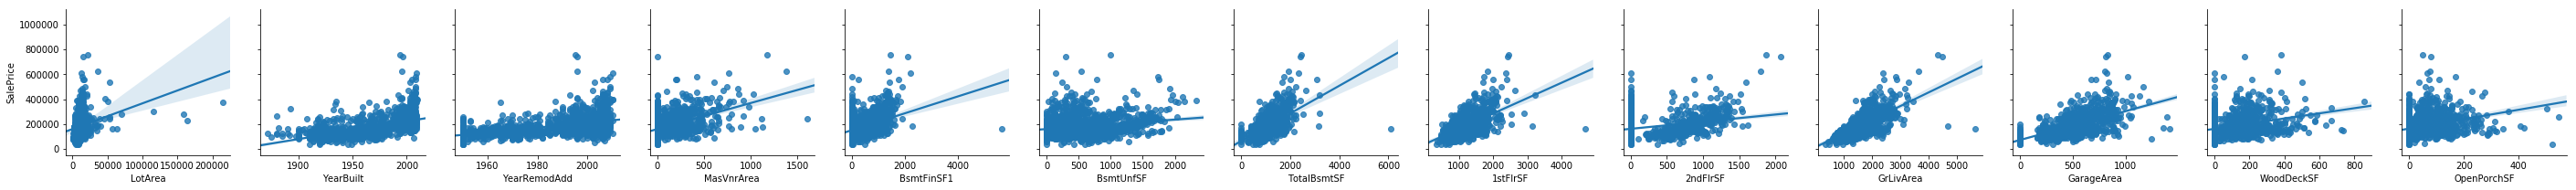

In [416]:
numeric_continuous.drop(columns=['LowQualFinSF','EnclosedPorch' ,'3SsnPorch', 'ScreenPorch', 'MiscVal','PoolArea', 'SalePrice'],inplace=True)
sns.pairplot(df_train, x_vars=numeric_continuous.columns, y_vars=["SalePrice"], size=3, aspect=1, kind="reg")

In [417]:
df_train = df_train[df_train.LotArea < 100000]
df_train = df_train[df_train.MasVnrArea < 1100]
df_train = df_train[df_train.BsmtFinSF1 < 4000]
df_train = df_train[df_train.TotalBsmtSF < 3000]
df_train['1stFl+2ndFl'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train.drop(columns=['1stFlrSF', '2ndFlrSF'], inplace=True)
df_train = df_train[df_train.GrLivArea < 4000]
df_train = df_train[df_train.WoodDeckSF < 700]
df_train = df_train[df_train.OpenPorchSF < 400]

numeric_continuous.drop(columns=['1stFlrSF', '2ndFlrSF'], inplace=True)                                                                   
numeric_continuous['1stFl+2ndFl'] = df_train['1stFl+2ndFl'] 


C:\Users\odize\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\odize\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


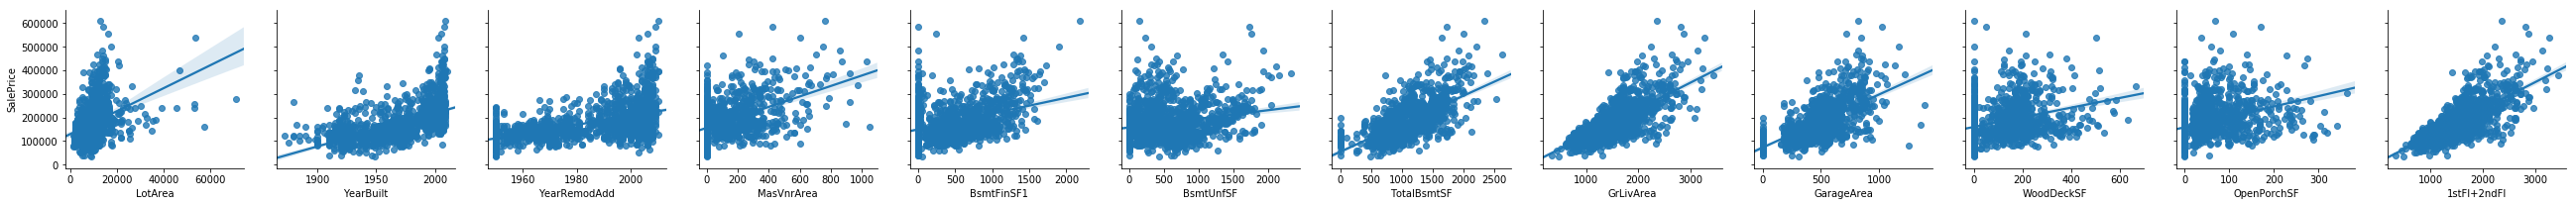

In [418]:
sns.pairplot(df_train, x_vars=numeric_continuous.columns, y_vars=["SalePrice"], size=3, aspect=1, kind="reg")


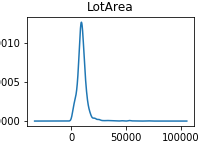
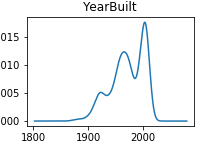
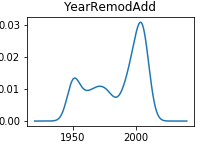
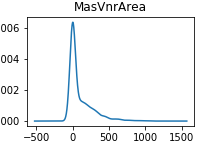
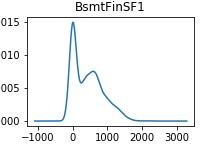
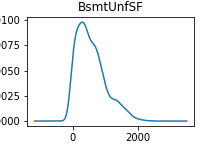
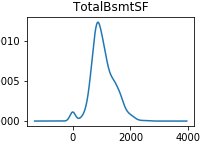
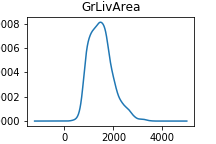
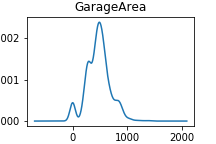
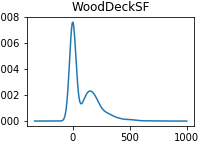
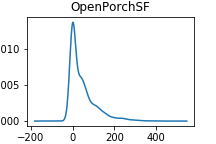
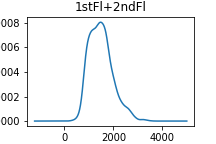

In [419]:
class FlowLayout(object):
    ''' A class / object to display plots in a horizontal / flow layout below a cell '''
    def __init__(self):
        # string buffer for the HTML: initially some CSS; images to be appended
        self.sHtml =  """
        <style>
        .floating-box {
        display: inline-block;
        margin: 10px;
        border: 3px solid #888888;  
        }
        </style>
        """

    def add_plot(self, oAxes):
        ''' Saves a PNG representation of a Matplotlib Axes object '''
        Bio=io.BytesIO() # bytes buffer for the plot
        fig = oAxes.get_figure()
        fig.canvas.print_png(Bio) # make a png of the plot in the buffer

        # encode the bytes as string using base 64 
        sB64Img = base64.b64encode(Bio.getvalue()).decode()
        self.sHtml+= (
            '<div class="floating-box">'+ 
            '<img src="data:image/png;base64,{}\n">'.format(sB64Img)+
            '</div>')

    def PassHtmlToCell(self):
        ''' Final step - display the accumulated HTML '''
        display(HTML(self.sHtml))


oPlot = FlowLayout() 

local_df = df_train[numeric_continuous.columns]
var_dist = None
for column in local_df:
    plot = local_df[column].plot.density(title=column, figsize=(3,2))
    oPlot.add_plot(plot) 
    plt.close() 


oPlot.PassHtmlToCell()

In [420]:
#df_train[numeric_continuous.columns] = df_train[numeric_continuous.columns].astype(float).applymap(lambda x: x+1).applymap(lambda x: x**5)
#df_train[numeric_continuous.columns] = df_train[numeric_continuous.columns].applymap(lambda x:boxcox(x))

In [421]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0, 1), copy=False)
df_train[numeric_continuous.columns] = scale.fit_transform(df_train[numeric_continuous.columns])

In [422]:
#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(2)
#df = pd.DataFrame(poly.fit_transform(df_train[numeric_continuous.columns]))

In [423]:
#import math
#df_train[numeric_continuous_columns.columns] = df_train[numeric_continuous_columns.columns].astype(float).applymap(lambda x: np.log1p(x))

In [424]:
train_saleprice = df_train.pop('SalePrice')

In [425]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, train_saleprice, test_size=0.01, random_state=0)

In [426]:
xgb = xgboost.XGBRegressor(booster='gblinear')
parameters = {'reg_lambda':[0.1, 0.3, 1, 3, 5], 'reg_alpha':[0.1, 0.3, 1, 3, 5], 'learning_rate':[0.1, 0.3, 1, 1.5, 2]}
clf = GridSearchCV(xgb, param_grid=parameters)
clf.fit(X_train, y_train)
print("Best r:", clf.best_score_)
print('Best reg_lambda:',clf.best_estimator_.reg_lambda) 
print('Best reg_alpha:',clf.best_estimator_.reg_alpha)
print('Best learning_rate:',clf.best_estimator_.learning_rate)                                                                                          

Best r: 0.901802431236
Best reg_lambda: 3
Best reg_alpha: 5
Best learning_rate: 0.3


In [427]:
local_var = None
for column in df_test:
    local_var = df_test[column].dtype
    if local_var == 'int64':
        df_test[column].fillna(np.mean(df_test[column]), inplace=True)

    elif local_var == 'float64':
        df_test[column].fillna(np.mean(df_test[column]), inplace=True)

    elif local_var == 'object':
        df_test[column].fillna('missing', inplace=True)

In [428]:
df_test = df_test.replace({"MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun", 7 : "Jul",
                                       8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"},
                           "MSSubClass" : {20 : "class20", 30 : "class30", 40 : "class40", 45 : "class45", 50 : "class50", 
                                           60 : "class60", 70 : "class70", 75 : "class75", 80 : "class80", 85 : "class85", 
                                           90 : "class90", 120 : "class120", 150 : None, 160 : "class160", 
                                           180 : "class180", 190 : "class190"},})

In [429]:
df_test = pd.get_dummies(df_test, prefix=get_dum, columns=get_dum)
df_test = pd.DataFrame(df_test)

In [430]:
df_test['1stFl+2ndFl'] = df_test['1stFlrSF'] + df_test['2ndFlrSF']

In [431]:
df_test.drop(columns=['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageYrBlt',
                      'GarageType', 'GarageFinish', 'Street', 'Utilities', 'LandContour', 'Condition2', 'RoofStyle', 
                      'RoofMatl','BsmtFinType2', 'Heating', 'Functional', 'GarageQual','Electrical', 'SaleType', 
                      'GarageCond', 'BsmtFinSF2', 'OverallCond','BsmtHalfBath','BedroomAbvGr','YrSold', 'LowQualFinSF',
                      'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'PoolArea', '1stFlrSF', '2ndFlrSF'], inplace=True);

In [432]:
#df_test[numeric_continuous.columns] = df_test[numeric_continuous.columns].astype(float).applymap(lambda x: x+1).applymap(lambda x: x**5)

In [433]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0, 1), copy=False)
df_test[numeric_continuous.columns] = scale.fit_transform(df_test[numeric_continuous.columns])

In [434]:
xgb = xgboost.XGBRegressor(booster='gblinear', learning_rate=0.3, reg_alpha=5, reg_lambda=3, cv=10)
xgb.fit(df_train, train_saleprice)

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
       colsample_bytree=1, cv=10, gamma=0, learning_rate=0.3,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=5, reg_lambda=3, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [435]:
results = pd.DataFrame(xgb.predict(df_test))
results.to_csv('housePricePred.csv', sep='\t', index=False)

In [436]:
#Kaggle submission scored rmse:0.14429, hope to improve the rank in the coming days.....